In [1]:
from swf import *
from utils import *
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def genButterflyCoeffs(w):
    a = 1/2 - w
    b = 1/8 + 2*w
    c = -1/16 - w
    d = w
    return a, b, c, d

def checkCoeffRelations(a,b,c,d):
    return 2*a + 2*b + 4*c + 2*d == 1

In [3]:
octvertices = np.array([[1,0,0],[-1,0,0],[0,1,0],[0,-1,0],[0,0,1],[0,0,-1]])
octfaces = np.array([[1,2,4],[1,3,4],[3,0,4],[0,2,4],[1,3,5],[3,0,5],[0,2,5],[2,1,5]])

layout704=np.array([[1,0,np.pi/2],[1,np.pi/6,np.pi/2],[1,-np.pi/6,np.pi/2],[1,np.pi/2,np.pi/2],[1,-np.pi/2,np.pi/2],[1,3*np.pi/4,np.pi/2],[1,-3*np.pi/4,np.pi/2],[1,np.pi/4,np.pi/4],[1,-np.pi/4,np.pi/4],[1,3*np.pi/4,np.pi/4],[1,-3*np.pi/4,np.pi/4]])
vertices704 = np.apply_along_axis(lambda x: toCartesian(x),1,layout704)
faces704 = np.array([[6,4,10],[10,4,8],[8,4,2],[8,2,0],[8,7,0],[7,0,1],[7,1,3],[7,3,9],[9,3,5],[10,7,9],[10,8,7],[10,6,5],[10,9,5]])

In [24]:
#ALPHA, BETA, GAMMA, DELTA = genButterflyCoeffs(0)
ALPHA, BETA, GAMMA, DELTA = (1/2,1/8,-1/16,0)
checkCoeffRelations(ALPHA,BETA,GAMMA,DELTA)

True

In [25]:
mesh = Trimesh(octvertices,octfaces,ALPHA=ALPHA,BETA=BETA,GAMMA=GAMMA,DELTA=DELTA)
format = SWF(mesh, n=3)

True
True
True


In [26]:
j = 1
k = 0
weights3D(format.meshes[-1],format.phi2s[j-1][k],f'$\overline {{\phi^{j}_{{{k}}}}}$')

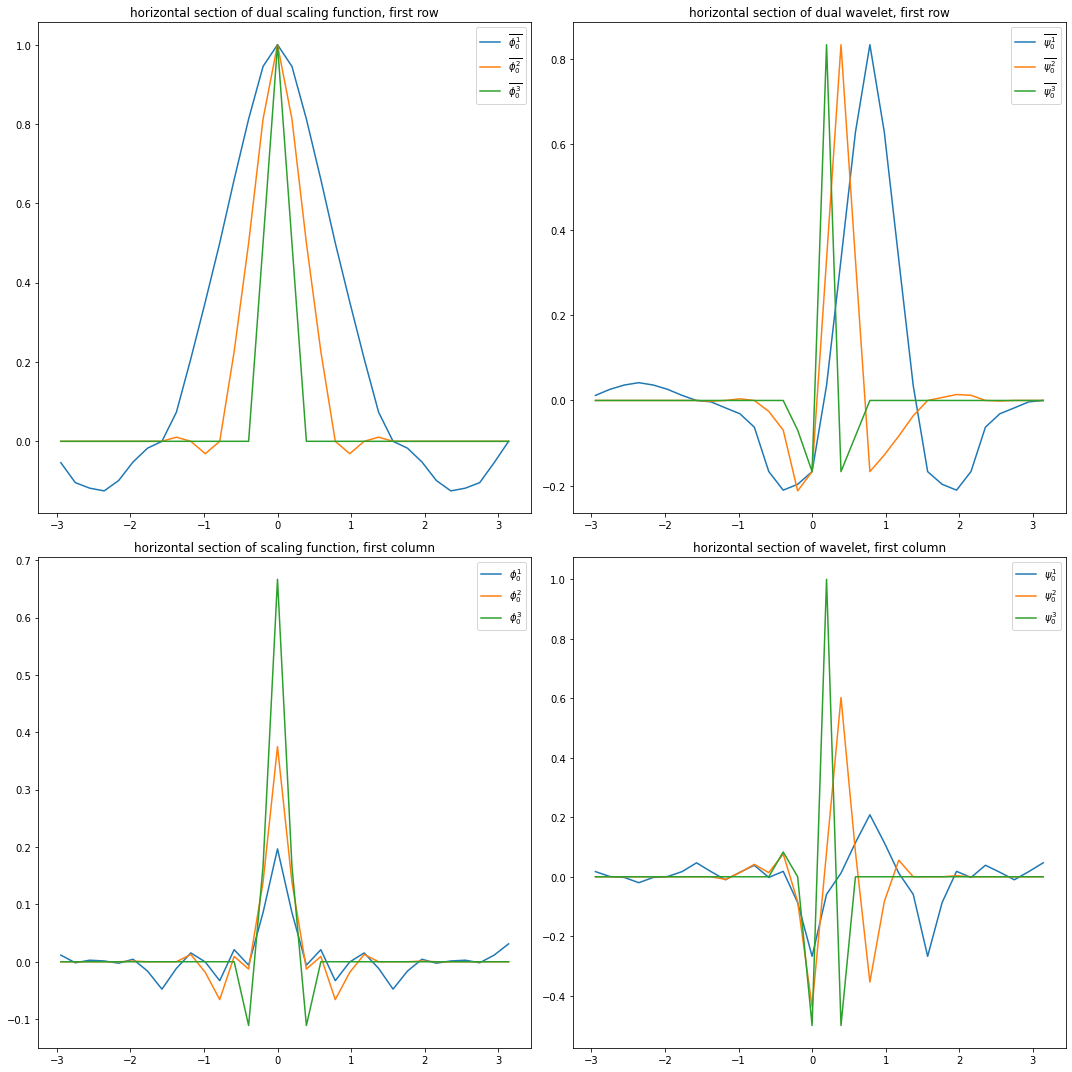

In [27]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
for i in range(0,format.n):
    mesh = format.meshes[-1]
    plane = np.isclose(mesh.vertices[:,2],np.zeros(mesh.vertices[:,2].shape))
    P,Q,A,B = (format.phis[i],format.psis[i],format.phi2s[i],format.psi2s[i]) #these variable names are misleading, they should really be phi, psi, phi dual, and psi dual.  
    azimuth = np.arctan2(mesh.vertices[:,1],mesh.vertices[:,0])[plane].flatten()
    sorts = np.argsort(azimuth)
    axs[0,0].plot(azimuth[sorts],A[0,:][plane].flatten()[sorts],'-',label=f'$\overline{{\phi^{i+1}_0}}$')
    
    axs[0,1].plot(azimuth[sorts],B[0,:][plane].flatten()[sorts],'-',label=f'$\overline{{\psi^{i+1}_0}}$')

    axs[1,0].plot(azimuth[sorts],P[:,0][plane].flatten()[sorts],'-',label=f'$\phi^{i+1}_0$')
    
    axs[1,1].plot(azimuth[sorts],Q[:,0][plane].flatten()[sorts],'-',label=f'$\psi^{i+1}_0$')
    
axs[0,0].set_title('horizontal section of dual scaling function, first row')
axs[0,1].set_title('horizontal section of dual wavelet, first row')
axs[1,0].set_title('horizontal section of scaling function, first column')
axs[1,1].set_title('horizontal section of wavelet, first column')
axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()
fig.tight_layout()

In [19]:
allones = np.ones([format.meshes[-1].vertices.shape[0],1])
firstone = np.vstack((1,np.zeros([format.meshes[-1].vertices.shape[0]-1,1])))
fineone = np.zeros([format.meshes[-1].vertices.shape[0],1])
fineone[58] = 1

In [20]:
res = format.phi2s[0]@fineone

In [21]:
res

array([[0.09375  ],
       [0.296875 ],
       [0.1015625],
       [0.203125 ],
       [0.203125 ],
       [0.1015625]])

In [22]:
res.shape

(6, 1)

In [23]:
res.sum()

1.0

In [13]:
#res.sum()-format.phi2s[0].shape[1]

In [14]:
#weights3D(format.base,res)

In [15]:
#weights3D(format.meshes[2],fineone)